# UNIVERSIDAD TÉCNICA PARTICULAR DE LOJA

## Título: Uso de aplicaciones colaborativas para el uso de herramientas de inteligencia artificial

### Autor: Jorge Martinez


---

### Detalles del dataset seleccionado:
**Título**: Accelerometer Data Set

## Introducción

En esta actividad se analiza un conjunto de datos obtenidos de un acelerómetro conectado a un ventilador en diferentes configuraciones de peso y velocidad. El objetivo es aplicar herramientas de inteligencia artificial para transformar y visualizar los datos, generando nuevas columnas a partir de las lecturas originales y detectando patrones de movimiento.


##### Contexto
Este conjunto de datos se generó para el proyecto «Predicción del tiempo de fallo del motor mediante una red neuronal artificial» (DOI: 10.3390/s19194342). Se utilizó un ventilador con pesos en las aspas para generar vibraciones. A este ventilador se le conectó un acelerómetro para recopilar los datos de vibración. Con estos datos, se realizaron predicciones del tiempo de fallo del motor mediante redes neuronales artificiales. Para generar tres escenarios de vibración distintos, los pesos se distribuyeron de tres maneras diferentes: 1) «rojo» - configuración normal: dos pesos colocados en aspas adyacentes; 2) «azul» - configuración perpendicular: dos pesos colocados en aspas formando un ángulo de 90°; 3) «verde» - configuración opuesta: dos pesos colocados en aspas opuestas. Se puede ver un diagrama esquemático en la figura 3 del artículo.

Dispositivos utilizados:
Ventilador Akasa AK-FN059 Viper de 12 cm (Generación de vibraciones)
Acelerómetro MMA8452Q (Medición de vibraciones)

Método de recopilación de datos:
Se configuraron 17 velocidades de rotación, que oscilaban entre el 20 % y el 100 % de la velocidad máxima del enfriador, a intervalos del 5 %, para las tres configuraciones de distribución de peso en las aspas del enfriador. Cabe destacar que el enfriador Akasa AK-FN059 tiene una velocidad de rotación máxima de 1900 rpm.

Las mediciones de vibración se recopilaron a una frecuencia de 20 ms durante 1 min para cada porcentaje, generando 3000 registros por velocidad. Por lo tanto, se recopilaron un total de 153 000 registros de vibración del modelo de simulación.

### Significado de cada Columna:
* wconfid : ID de configuración de peso (1 - 'rojo' - configuración normal; 2 - 'azul' - configuración perpendicular; 3 - 'verde'
* pctid: El porcentaje de velocidad RPM del ventilador del enfriador es (20 significa 20 %, y así sucesivamente).
* x: Valor x del acelerómetro.
* y: Valor y del acelerómetro.
* z: Valor z del acelerómetro.

#### Fuente: https://www.kaggle.com/datasets/dhinaharp/accelerometer-data-set

In [ ]:
# Importaciion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Se utiliza la librería `pandas` para cargar el archivo `accelerometer.csv` y se muestran las primeras filas del DataFrame. También se revisa la estructura general de los datos y se confirma que no existen valores nulos.


In [ ]:
df = pd.read_csv('accelerometer.csv')
df.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


#### Imprimir la informacion del dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


In [ ]:
df.isnull()

,wconfid,pctid,x,y,z
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
152995,False,False,False,False,False
152996,False,False,False,False,False
152997,False,False,False,False,False
152998,False,False,False,False,False


## Ingeniería de Características

Se crean 4 nuevas columnas a partir de los datos originales:

1. **`magnitude`**: Magnitud total de la aceleración.
2. **`energy`**: Energía de la señal calculada como la suma de cuadrados.
3. **`tilt_x`**: Ángulo de inclinación en el eje X en grados.
4. **`motion_state`**: Estado categórico de movimiento (`Active` o `Idle`) según la magnitud.

Estas características permiten entender mejor el comportamiento dinámico del sistema.


In [ ]:
def magnitude_function(row):
    value = np.sqrt(row['x']**2 + row['y']**2 + row['z']**2)
    return value

def compute_energy(row):
    value = row['x']**2 + row['y']**2 + row['z']**2
    return value

def tilt_x(row):
    value = np.arctan2(row['x'], np.sqrt(row['y']**2 + row['z']**2)) * (180 / np.pi)
    return value

def classify_motion(mag, threshold=1.1):
    if mag >= threshold:
        return 'Active'
    else:
        return 'Idle'

In [ ]:
df['magnitude'] = df.apply(magnitude_function, axis=1) # combina X, Y, Z para calcular la aceleracion total

df['energy'] = df.apply(compute_energy,  axis=1) #Se utiliza a menudo en modelos de reconocimiento de actividad. Es la suma de cuadrados sobre una ventana (indica la intensidad del movimiento).

df['tilt_x'] =  df.apply(tilt_x, axis=1) # Puede calcular el ángulo de inclinación con respecto a cada eje (por ejemplo, con respecto a la gravedad):

df['motion_state'] = df['magnitude'].apply(classify_motion) # determina si esta en estado estacinario o activo



In [ ]:
df.head()

,wconfid,pctid,x,y,z,magnitude,energy,tilt_x,motion_state
0,1,20,1.004,0.090,-0.125,1.015747,1.031741,81.277940,Idle
1,1,20,1.004,-0.043,-0.125,1.012665,1.025490,82.499431,Idle
2,1,20,0.969,0.090,-0.121,0.980664,0.961702,81.154268,Idle
3,1,20,0.973,-0.012,-0.137,0.982671,0.965642,81.955061,Idle
4,1,20,1.000,-0.016,-0.121,1.007421,1.014897,83.041281,Idle


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   wconfid       153000 non-null  int64  
 1   pctid         153000 non-null  int64  
 2   x             153000 non-null  float64
 3   y             153000 non-null  float64
 4   z             153000 non-null  float64
 5   magnitude     153000 non-null  float64
 6   energy        153000 non-null  float64
 7   tilt_x        153000 non-null  float64
 8   motion_state  153000 non-null  object 
dtypes: float64(6), int64(2), object(1)
memory usage: 10.5+ MB


## Visualización de Datos

Se generan dos visualizaciones:

- Un gráfico de línea de las aceleraciones en los ejes `x`, `y`, `z` a lo largo del tiempo.
- Un histograma de la energía de la señal, que muestra la distribución de intensidad del movimiento.

Ambos gráficos están etiquetados con unidades físicas correspondientes.


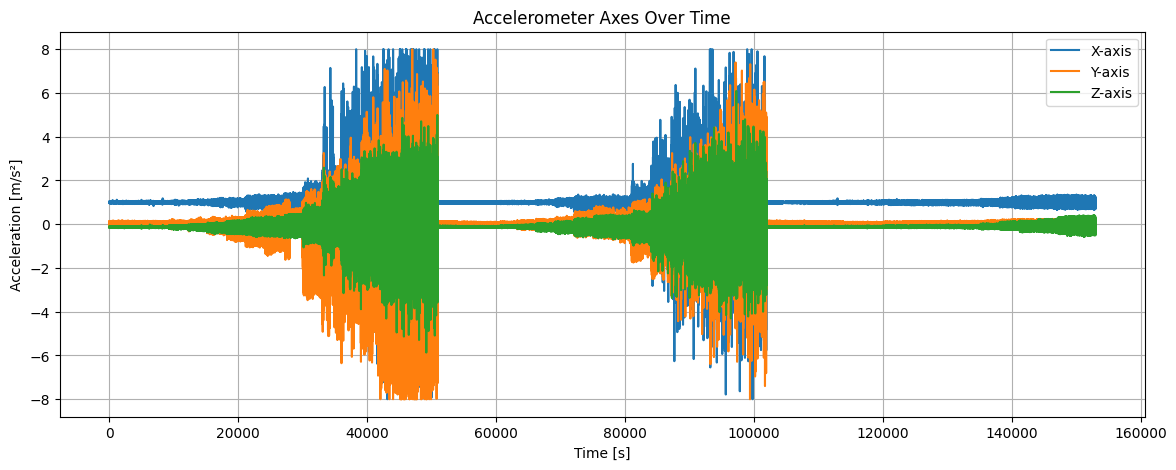

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df['x'], label='X-axis')
plt.plot(df['y'], label='Y-axis')
plt.plot(df['z'], label='Z-axis')
plt.title('Accelerometer Axes Over Time')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s²]')
plt.legend()
plt.grid()
plt.show()

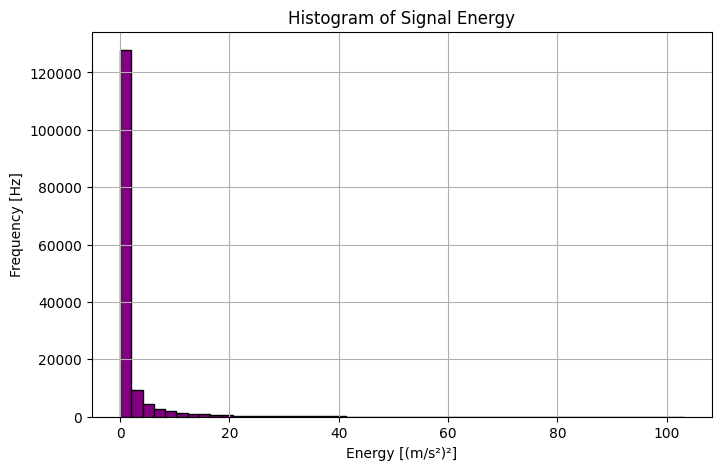

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['energy'], bins=50, color='purple', edgecolor='black')
plt.title('Histogram of Signal Energy')
plt.xlabel('Energy [(m/s²)²]')
plt.ylabel('Frequency [Hz]')
plt.grid()
plt.show()

## Conclusión

Este análisis permite observar el comportamiento del sistema mecánico a través de sensores de aceleración. Las nuevas columnas generadas facilitan la detección de patrones de movimiento y podrían ser utilizadas en modelos de predicción de fallos o clasificación de estados del sistema. Se ha cumplido con el objetivo de aplicar herramientas de ciencia de datos e inteligencia artificial en un entorno colaborativo.

**Links:**
- [Notebook en Google Colab](https://colab.research.google.com/github/martz84/aplicaciones-colaborativas/blob/main/Lab1.ipynb)
- [Repositorio en GitHub](https://github.com/martz84/aplicaciones-colaborativas.git)

